In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
plddt_dict_sman = json.loads(open("./Sman.json").read())
plddt_dict_cele = json.loads(open("./Cel.json").read())

In [3]:
print(len(plddt_dict_sman))
print(len(plddt_dict_cele))

13865
19694


In [4]:
def mean_plddt(lddt_dict):
    mean = {x:np.mean(y) for x,y in lddt_dict.items()}
    return mean

In [5]:
def under_thresh_perc(value_array, thresh):
    selected = (value_array <= thresh).sum()
    return selected/len(value_array)

In [6]:
def idr_per_calc_dict(lddt_dict, thresh):
    lddt = {x:np.array(y) for x,y in lddt_dict.items()}
    idr_frac = {x:under_thresh_perc(y, thresh) for x,y in  lddt.items()}
    return idr_frac

In [7]:
mean_lddt_sman = mean_plddt(plddt_dict_sman)
mean_lddt_cele = mean_plddt(plddt_dict_cele)

In [28]:
lddt_50_frac_sman = idr_per_calc_dict(plddt_dict_sman, 50)
lddt_50_frac_cele = idr_per_calc_dict(plddt_dict_cele, 50)

We want to plot the distribution of mean pLDDT of proteins of two organisms

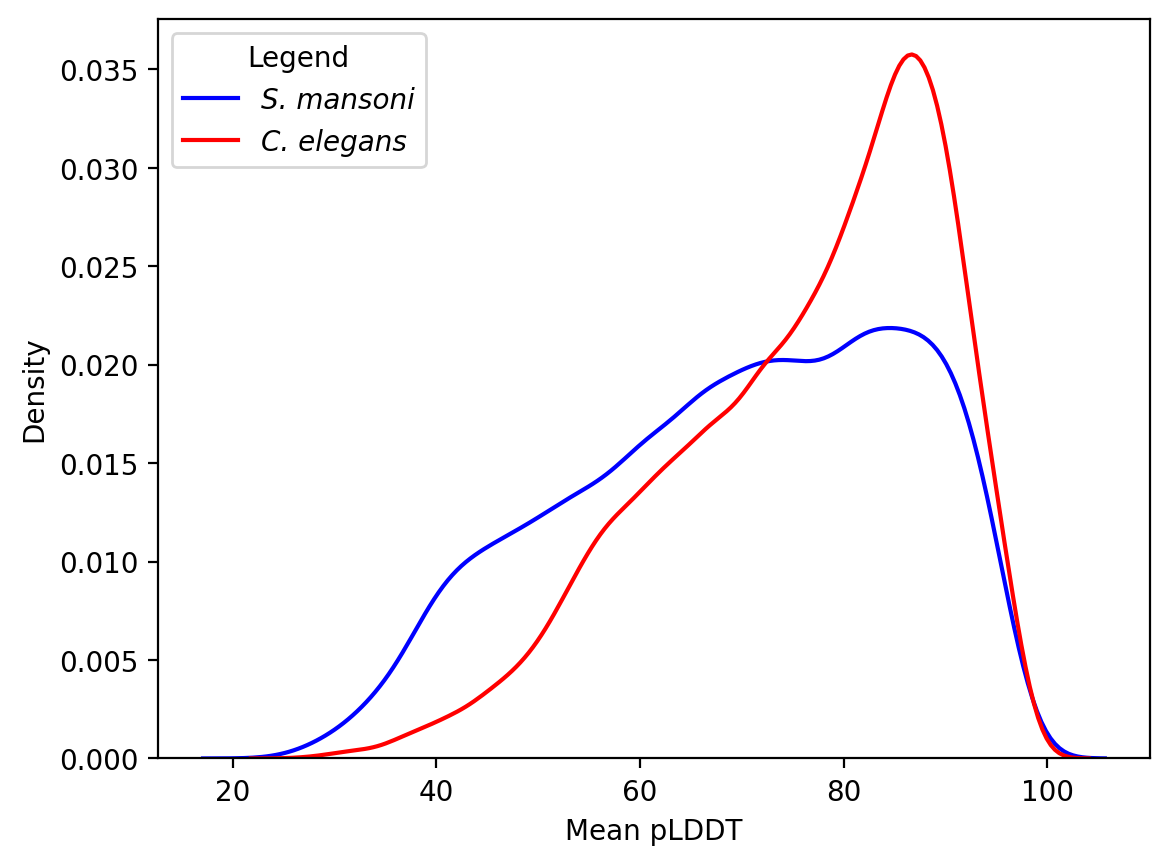

In [26]:
%config InlineBackend.figure_format = 'retina'

sns.reset_defaults()

sns.kdeplot(np.array(list(mean_lddt_sman.values())), color='blue', label='S. mansoni')
sns.kdeplot(np.array(list(mean_lddt_cele.values())), color='red', label='C. elegans')

# Adding labels and title
plt.xlabel('Mean pLDDT')
plt.ylabel('Density')

#plt.legend([r'\textit{S. mansoni}', r'\textit{C. elegans}'])
plt.legend(fontsize='medium', title_fontsize='medium', title='Legend', loc='upper left', 
           prop={'style':'italic'})
# Displaying the plot
plt.show()

In the following cell, we plot the distribution of the fraction of protein amino acids with pLDDT below 50, as the pLDDT below 50 shows low-confidence structure predictions.

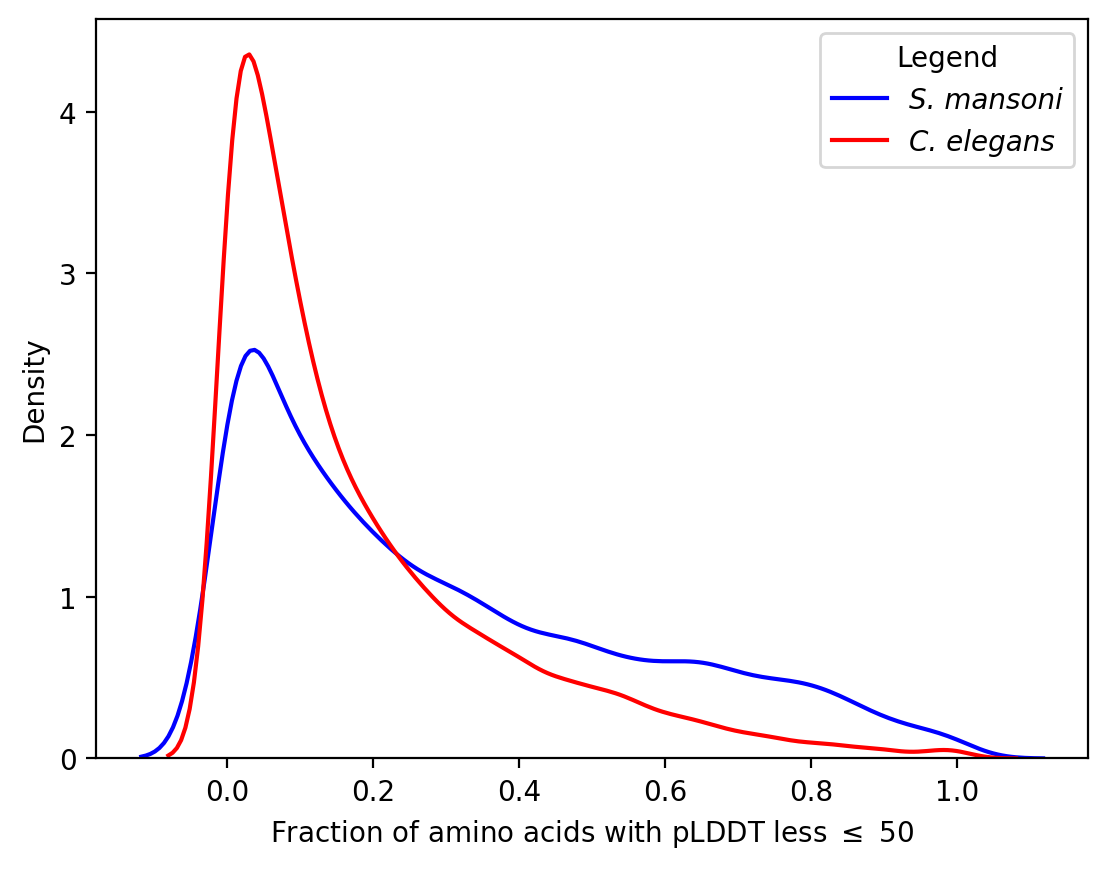

In [32]:
%config InlineBackend.figure_format = 'retina'

sns.reset_defaults()

sns.kdeplot(np.array(list(lddt_50_frac_sman.values())), color='blue', label='S. mansoni')
sns.kdeplot(np.array(list(lddt_50_frac_cele.values())), color='red', label='C. elegans')

# Adding labels and title
plt.xlabel('Fraction of amino acids with pLDDT less $\leq$ 50')
plt.ylabel('Density')

#plt.legend([r'\textit{S. mansoni}', r'\textit{C. elegans}'])
plt.legend(fontsize='medium', title_fontsize='medium', title='Legend', loc='upper right', 
           prop={'style':'italic'})
# Displaying the plot
plt.show()